In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

In [3]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

In [4]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

In [5]:
# place your code here
X_real_zeros = X[numeric_cols].fillna(0)
# X_real_mean = X[numeric_cols].fillna(X[numeric_cols].mean())
X_cat = X[categorical_cols].astype(str)

In [7]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV
encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

In [8]:
from sklearn.cross_validation import train_test_split

In [15]:
# from sklearn.cross_validation import train_test_split
# (X_train_real_zeros, 
#  X_test_real_zeros, 
#  y_train, y_test) = train_test_split(X_real_zeros, y, 
#                                      test_size=0.3, 
#                                      random_state=0)
# # (X_train_real_mean, 
# #  X_test_real_mean) = train_test_split(X_real_mean, 
# #                                       test_size=0.3, 
# #                                       random_state=0)
# (X_train_cat_oh,
#  X_test_cat_oh) = train_test_split(X_cat_oh, 
#                                    test_size=0.3, 
#                                    random_state=0)

In [10]:
# from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores = [[item[0]['C'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
# def write_answer_1(auc_1, auc_2):
#     answers = [auc_1, auc_2]
#     with open("preprocessing_lr_answer1.txt", "w") as fout:
#         fout.write(" ".join([str(num) for num in answers]))
        
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

# # place your code here
# def fit(x_train, x_test, class_weight=None):
#     estimator = LogisticRegression(class_weight=class_weight)
#     optimizer = GridSearchCV(estimator, param_grid, cv=cv)
#     optimizer.fit(np.hstack((np.array(x_train), X_train_cat_oh)), y_train)
#     plot_scores(optimizer)
#     print(optimizer.best_params_)
#     auc = roc_auc_score(y_test, optimizer.predict(np.hstack((np.array(x_test), X_test_cat_oh))))
#     print(auc)
#     return auc 

In [11]:
# %time auc_1 = fit(X_train_real_mean, X_test_real_mean)
# %time auc_2 = fit(X_train_real_zeros, X_test_real_zeros)
# write_answer_1(auc_1, auc_2)
# auc_2 - auc_1

In [12]:
from sklearn.preprocessing import StandardScaler

# place your code here
scaler = StandardScaler()
# X_train_real_scaled = scaler.fit_transform(X_train_real_zeros)
# X_test_real_scaled = scaler.transform(X_test_real_zeros)

In [13]:
# pd.DataFrame(X_train_real_scaled).round(2).describe()

In [14]:
# def write_answer_2(auc):
#     with open("preprocessing_lr_answer2.txt", "w") as fout:
#         fout.write(str(auc))
        
# # place your code here
# %time auc_3 = fit(X_train_real_scaled, X_test_real_scaled)
# write_answer_2(auc_3)
# auc_3 - auc_2

In [15]:
# def write_answer_3(auc_1, auc_2):
#     answers = [auc_1, auc_2]
#     with open("preprocessing_lr_answer3.txt", "w") as fout:
#         fout.write(" ".join([str(num) for num in answers]))
        
# # place your code here
# %time auc_4 = fit(X_train_real_scaled, X_test_real_scaled, class_weight='balanced')

In [18]:
def hs(x1, x2): return np.hstack((np.array(x1), x2))

# def fit4(xl, xt, yl, yt, class_weight=None, fit_intercept=True):
#     optimizer = GridSearchCV(LogisticRegression(fit_intercept=fit_intercept, class_weight=class_weight), param_grid, cv=cv)
#     optimizer.fit(xl, yl)
#     plot_scores(optimizer)
#     print(optimizer.best_params_)
#     auc = roc_auc_score(yt, optimizer.predict(xt))
#     print(auc)
#     return auc

In [ ]:
# %%time
# np.random.seed(0)
# size = np.sum(y_train==0) - np.sum(y_train==1) 
# X_train = hs(X_train_real_scaled, X_train_cat_oh)
# indices_to_add = np.random.randint(np.sum(y_train==1), size=size)
# X_train_to_add = X_train[y_train.as_matrix() == 1,:][indices_to_add, :]
# xl = np.vstack((X_train, X_train_to_add))
# yl = hs(y_train, np.repeat(1, size).T)
# xt = hs(X_test_real_scaled, X_test_cat_oh)

# auc_5 = fit4(xl, xt, yl, y_test)
# write_answer_3(auc_4, auc_5)
# print(auc_5 - auc_4)

In [ ]:
# sorted(zip([auc_1, auc_2, auc_3, auc_4, auc_5],[1,2,3,4,5]))

In [16]:
def write_answer_4(auc):
    with open("preprocessing_lr_answer4.txt", "w") as fout:
        fout.write(str(auc))
    
# разбить
# StandardScaler
# 3. np.concatenate((X_train_real_scaled,X_train_cat_oh),axis=1)
# 4. roc_auc_zero = get_roc_auc(X_z_train,y_train,X_z_test,y_test,'balanced')

In [24]:
def fit5(xl, xt, yl, yt, class_weight=None, fit_intercept=True, penalty='l2'):
    optimizer = GridSearchCV(LR(penalty=penalty, fit_intercept=fit_intercept, class_weight=class_weight), param_grid, cv=cv)
    optimizer.fit(xl, yl)
    plot_scores(optimizer)
    print(optimizer.best_params_)
    auc = roc_auc_score(yt, optimizer.predict(xt))
    print(auc)
    return auc, optimizer

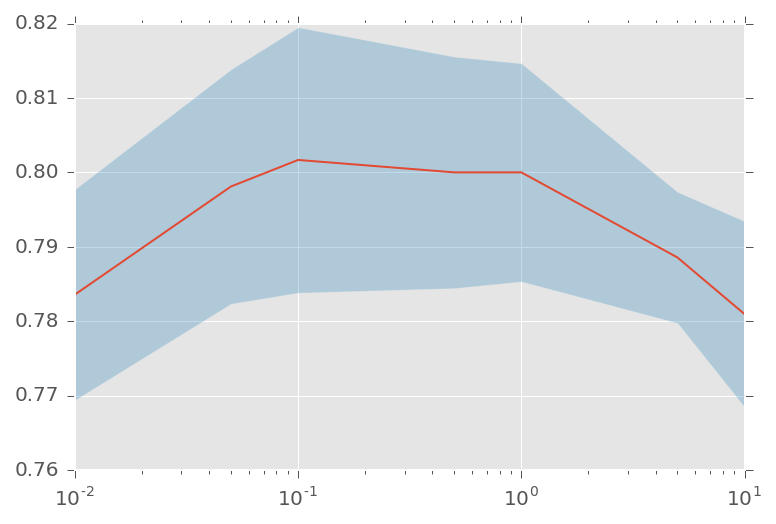

{'C': 0.1}
0.788597316138
CPU times: user 4.41 s, sys: 410 ms, total: 4.82 s
Wall time: 4.87 s


In [38]:
%%time
ka = {'test_size':0.3, 'random_state':0, 'stratify':y}
(xl1, xt1, yl, yt) = train_test_split(X_real_zeros, y, **ka)
(xl2, xt2) = train_test_split(X_cat_oh, **ka)
xl = hs(scaler.fit_transform(xl1), xl2)
xt = hs(scaler.transform(xt1), xt2)
auc_6, opt = fit5(xl, xt, yl, yt, class_weight='balanced')
write_answer_4(auc_6)

In [ ]:
# sorted(zip([auc_1, auc_2, auc_3, auc_4, auc_5, auc_6],[1,2,3,4,5,6]))
# [auc_1, auc_2, auc_3, auc_4, auc_5, auc_6]

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# """Инициализируем класс, который выполняет преобразование"""
# transform = PolynomialFeatures(2)
# """Обучаем преобразование на обучающей выборке, применяем его к тестовой"""
# example_data_train_poly = transform.fit_transform(example_data_train)
# example_data_test_poly = transform.transform(example_data_test)
# """Обращаем внимание на параметр fit_intercept=False"""
# optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
# optimizer.fit(example_data_train_poly, example_labels_train)
# Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
# plt.scatter(data_0[:,0], data_0[:,1], color='red')
# plt.scatter(data_1[:,0], data_1[:,1], color='blue')
# plt.title('With class weights')
# plt.show()

## Задание 5. Трансформация вещественных признаков.

1. Реализуйте по аналогии с примером преобразование вещественных признаков модели при помощи полиномиальных признаков степени 2
2. Постройте логистическую регрессию на новых данных, одновременно подобрав оптимальные гиперпараметры. Обращаем внимание, что в преобразованных признаках уже присутствует столбец, все значения которого равны 1, поэтому обучать дополнительно значение $b$ не нужно, его функцию выполняет один из весов $w$. В связи с этим во избежание линейной зависимости в датасете, в вызов класса логистической регрессии требуется передавать параметр fit_intercept=False. Для обучения используйте стратифицированные выборки с балансировкой классов при помощи весов, преобразованные признаки требуется заново отмасштабировать.
3. Получите AUC ROC на тесте и сравните данный результат с использованием обычных признаков.
4. Передайте полученный ответ в функцию write_answer_5.

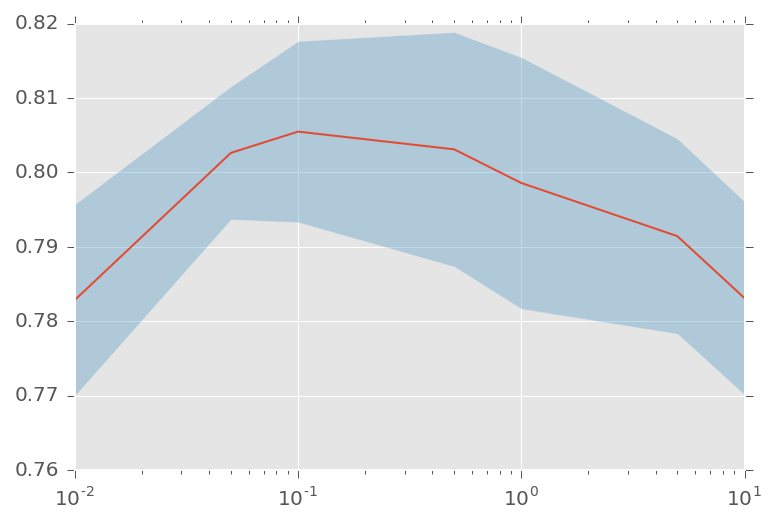

{'C': 0.1}
0.795217410774
CPU times: user 11.1 s, sys: 450 ms, total: 11.6 s
Wall time: 11.7 s


In [47]:
%%time
def write_answer_5(auc):
    with open("preprocessing_lr_answer5.txt", "w") as fout:
        fout.write(str(auc))
transform = PolynomialFeatures(2)
xlp1 = transform.fit_transform(xl1)
xtp1 = transform.transform(xt1)
xlp = hs(scaler.fit_transform(xlp1), xl2)
xtp = hs(scaler.transform(xtp1), xt2)
auc_7, opt = fit5(xlp, xtp, yl, yt, class_weight='balanced', fit_intercept=False)
write_answer_5(auc_7)
#         0.775163076739

In [41]:
# sorted(zip([auc_1, auc_2, auc_3, auc_4, auc_5, auc_6, auc_7],[1,2,3,4,5,6,7]))
# xlp.shape[1], xl1.shape[1]+xl2.shape[1], xl.shape[1]

## Регрессия Lasso.
К логистической регрессии также можно применить L1-регуляризацию (Lasso), вместо регуляризации L2, которая будет приводить к отбору признаков. Вам предлагается применить L1-регуляцию к исходным признакам и проинтерпретировать полученные результаты (применение отбора признаков к полиномиальным так же можно успешно применять, но в нём уже будет отсутствовать компонента интерпретации, т.к. смысловое значение оригинальных признаков известно, а полиномиальных - уже может быть достаточно нетривиально). Для вызова логистической регрессии с L1-регуляризацией достаточно передать параметр penalty='l1' в инициализацию класса.

## Задание 6. Отбор признаков при помощи регрессии Lasso.
1. Обучите регрессию Lasso на стратифицированных отмасштабированных выборках, используя балансировку классов при помощи весов.
2. Получите ROC AUC регрессии, сравните его с предыдущими результатами.
3. Найдите номера вещественных признаков, которые имеют нулевые веса в итоговой модели.
4. Передайте их список функции write_answer_6.

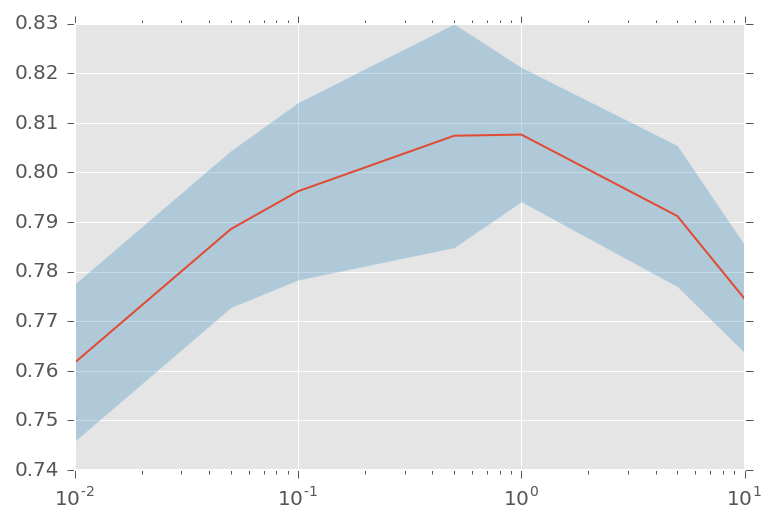

{'C': 1}
0.797314644814
(5086, array([   4,    6,    7, ..., 5600, 5602, 5605]))
CPU times: user 5.92 s, sys: 1.59 s, total: 7.51 s
Wall time: 7.55 s


In [43]:
%%time
def write_answer_6(features):
    with open("preprocessing_lr_answer6.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in features]))
auc_8, optimizer = fit5(xl, xt, yl, yt, class_weight='balanced', penalty='l1')

In [51]:
coef = optimizer.best_estimator_.coef_[0][:13]
features = np.where(coef == 0)[0]
print(len(features), features)
write_answer_6(features)
# c = optimizer.best_estimator_.coef_[0]
# np.where(c != 0)[0], c[c != 0]

(3, array([4, 6, 7]))


In [52]:
coef

array([ 0.01125206,  0.04078903, -0.0888165 , -0.06784749,  0.        ,
       -0.0051485 ,  0.        ,  0.        ,  0.0262044 , -0.00731936,
        0.23229943,  1.0650948 , -1.43376068])

In [ ]:
# sorted(zip([auc_1, auc_2, auc_3, auc_4, auc_5, auc_6, auc_7, auc_8],[1,2,3,4,5,6,7,8]))

In [50]:
# NumPy: 1.10.4 и выше
# Pandas: 0.17.1 и выше
# Scikit-learn: 0.17 и выше
import sklearn
np.__version__, pd.__version__, sklearn.__version__

('1.10.4', u'0.17.1', '0.17.1')